### Lab 7 - Hierarchical Clustering

The healthy_lifestyle dataset contains information on lifestyle measures such as amount of sunshine, pollution, and happiness levels for 44 major cities around the world. Apply agglomerative clustering to the cities' number of hours of sunshine and happiness levels using both sklearn and SciPy.

Import the needed packages for agglomerative clustering from sklearn and SciPy.
Initialize and fit an agglomerative clustering model using sklearn's AgglomerativeClustering() function. Use the user-defined number of clusters and ward linkage.  
Add cluster labels to the healthy dataframe.  
Calculate the distances between all instances using SciPy's pdist() function.  
Convert the distance matrix to a square matrix using SciPy's squareform() function.  
Define a clustering model with ward linkage using SciPy's linkage() function.

```python
Ex: If the input is:

4
the output should be:

   sunshine_hours  happiness_levels  labels
0          1858.0              7.44       3
1          2636.0              7.22       0
2          1884.0              7.29       3
3          1821.0              7.35       3
4          1630.0              7.64       3
First five rows of the linkage matrix from SciPy:
 [[39. 40.  0.  2.]
 [28. 43.  0.  3.]
 [ 7. 18.  0.  2.]
 [ 0.  3.  0.  2.]
 [ 8. 42.  0.  2.]]
```


In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import needed sklearn packages
from sklearn.preprocessing import StandardScaler

# Import needed scipy packages
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform



In [22]:
healthy = pd.read_csv('data/healthy_lifestyle.csv')
healthy = healthy.dropna(subset=['sunshine_hours', 'happiness_levels'])

In [49]:
# Input the number of clusters
number = int(input("Enter the number of clusters: "))

# Define input features
X = healthy[['sunshine_hours', 'happiness_levels']]



In [48]:
# Use StandardScaler() to standardize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['sunshine_hours', 'happiness_levels'])

In [54]:
# Initialize and fit an agglomerative clustering model using ward linkage in scikit-learn, with a user-defined
# number of clusters
from sklearn.cluster import AgglomerativeClustering
clustersHealthySklearnFit = AgglomerativeClustering(n_clusters=number, linkage='ward')
clustersHealthySklearnFit.fit(X_scaled)

# Add cluster labels to the healthy dataframe
healthy['labels'] = clustersHealthySklearnFit.labels_
print(healthy[['sunshine_hours', 'happiness_levels', 'labels']].head())

# Perform agglomerative clustering using SciPy
# Calculate the distances between all instances
distance_matrix = pdist(X)

# Convert the distance matrix to a square matrix
distance_matrix_square = squareform(distance_matrix)

# Define a clustering model with ward linkage
clustersHealthyScipy = linkage(distance_matrix, method='ward')

print('First five rows of the linkage matrix from SciPy:\n', np.round(clustersHealthyScipy[:5, :], 0))


   sunshine_hours  happiness_levels  labels
0          1858.0              7.44       3
1          2636.0              7.22       0
2          1884.0              7.29       3
3          1821.0              7.35       3
4          1630.0              7.64       3
First five rows of the linkage matrix from SciPy:
 [[18. 33.  0.  2.]
 [ 6. 15.  1.  2.]
 [ 5. 43.  1.  3.]
 [14. 17.  1.  2.]
 [ 1. 25.  2.  2.]]


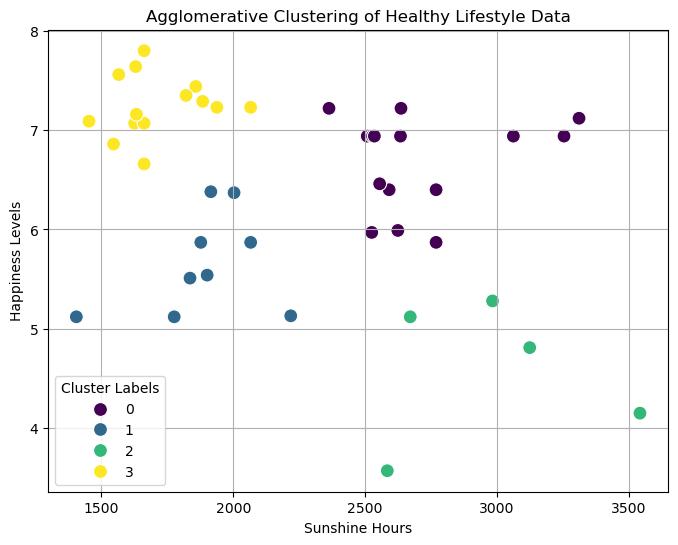

In [ ]:
# Plot the clusters using matplotlib
plt.figure(figsize=(8, 6))
# Create Scatterplot here
sns.scatterplot(data=healthy, x='sunshine_hours', y='happiness_levels', hue='labels', palette='viridis', s=100)
plt.title('Agglomerative Clustering of Healthy Lifestyle Data')
plt.xlabel('Sunshine Hours')
plt.ylabel('Happiness Levels')
plt.legend(title='Cluster Labels')
plt.grid(True)
plt.show()